In [118]:
import pandas as pd
import numpy as np

data=pd.read_csv('./UCI_Credit_Card.csv')
next_month=data['default.payment.next.month'].value_counts()

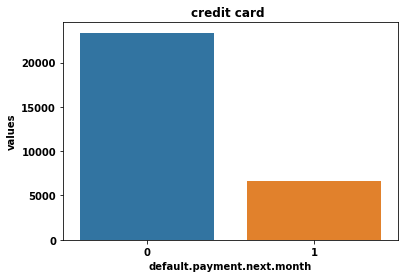

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.DataFrame({'default.payment.next.month':next_month.index,'values':next_month.values})
plt.title('credit card ')
sns.barplot(x='default.payment.next.month',y='values',data=df)
plt.show()

In [120]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline


data.drop(['ID'],inplace=True,axis=1)
target=data['default.payment.next.month'].values
columns=data.columns.tolist()
columns.remove('default.payment.next.month')
features=data[columns].values

train_x,test_x,train_y,test_y=train_test_split(features,target,test_size=0.3)

classifiers=[
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
]

classifier_names=['svc','decisiontreeclassifier','randomforestclassifier','kneighborsclassifier']

classifier_param_grid=[
    {'svc__C':[1],'svc__gamma':[0.01]},
    {'decisiontreeclassifier__max_depth':[6,9,11]},
    {'randomforestclassifier__n_estimators':[3,5,6]},
    {'kneighborsclassifier__n_neighbors':[4,6,8]}
]


In [121]:
best_score=0

def GridSearchCV_work(pipline,train_x,train_y,test_x,test_y,param_grid,score):
    global best_score
    gridsearch=GridSearchCV(estimator=pipline,param_grid=param_grid,scoring=score)
    search=gridsearch.fit(train_x,train_y)
    predict_y=gridsearch.predict(test_x)
    print('best_score:',search.best_score_)
    print('best_param:',search.best_params_)
    print('accuracy %0.4lf'%accuracy_score(test_y,predict_y))
    
    if search.best_score_>best_score:
        best_score=search.best_score_
        best_param_grid=param_grid
        return best_score,best_param_grid
    
for model,model_name,model_param_grid in zip(classifiers,classifier_names,classifier_param_grid):
    pipline=Pipeline([
        ('scaler',StandardScaler()),
        (model_name,model)
    ])
    result=GridSearchCV_work(pipline,train_x,train_y,test_x,test_y,model_param_grid,score='accuracy')
# print('best_score{} ,best_param_grid{}'.format(best_score,best_param_grid))

best_score: 0.8182380952380953
best_param: {'svc__C': 1, 'svc__gamma': 0.01}
accuracy 0.8144
best_score: 0.8189523809523809
best_param: {'decisiontreeclassifier__max_depth': 6}
accuracy 0.8153
best_score: 0.8
best_param: {'randomforestclassifier__n_estimators': 6}
accuracy 0.7959
best_score: 0.8066666666666666
best_param: {'kneighborsclassifier__n_neighbors': 8}
accuracy 0.8042
